# Let's Examine some data
This is a sample of a data set that is called Adults:
http://archive.ics.uci.edu/ml/datasets/Adult

# Data Description
1. age: continuous.
2. workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
3. fnlwgt: continuous.
4. education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
5. education-num: continuous.
6. marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF spouse.
7. occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
8. relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
9. race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
10. sex: Female, Male.
11. capital-gain: continuous.
12. capital-loss: continuous.
13. hours-per-week: continuous.
14. native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

url = "http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
path = "data/adult.data"
columns = [
    "age",
    "workclass",
    "fnlwgt",
    "education",
    "education-num",
    "marital-status",
    "occupation",
    "relationship",
    "race",
    "sex",
    "capital-gain",
    "capital-loss",
    "hours-per-week",
    "native-country",
    "income"
    ]
csv_data = pd.read_csv(url, sep=", ", names=columns, nrows=100000).dropna()


In [ ]:
csv_data.head()


In [157]:
csv_data.describe()

/Users/rohitghatol/anaconda/lib/python3.5/site-packages/numpy/lib/function_base.py:3403: RuntimeWarning: Invalid value encountered in median
  RuntimeWarning)


,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,prediction
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000,1000.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456,0.188000
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429,0.390908
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000,NaN
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000,NaN
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000,NaN
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


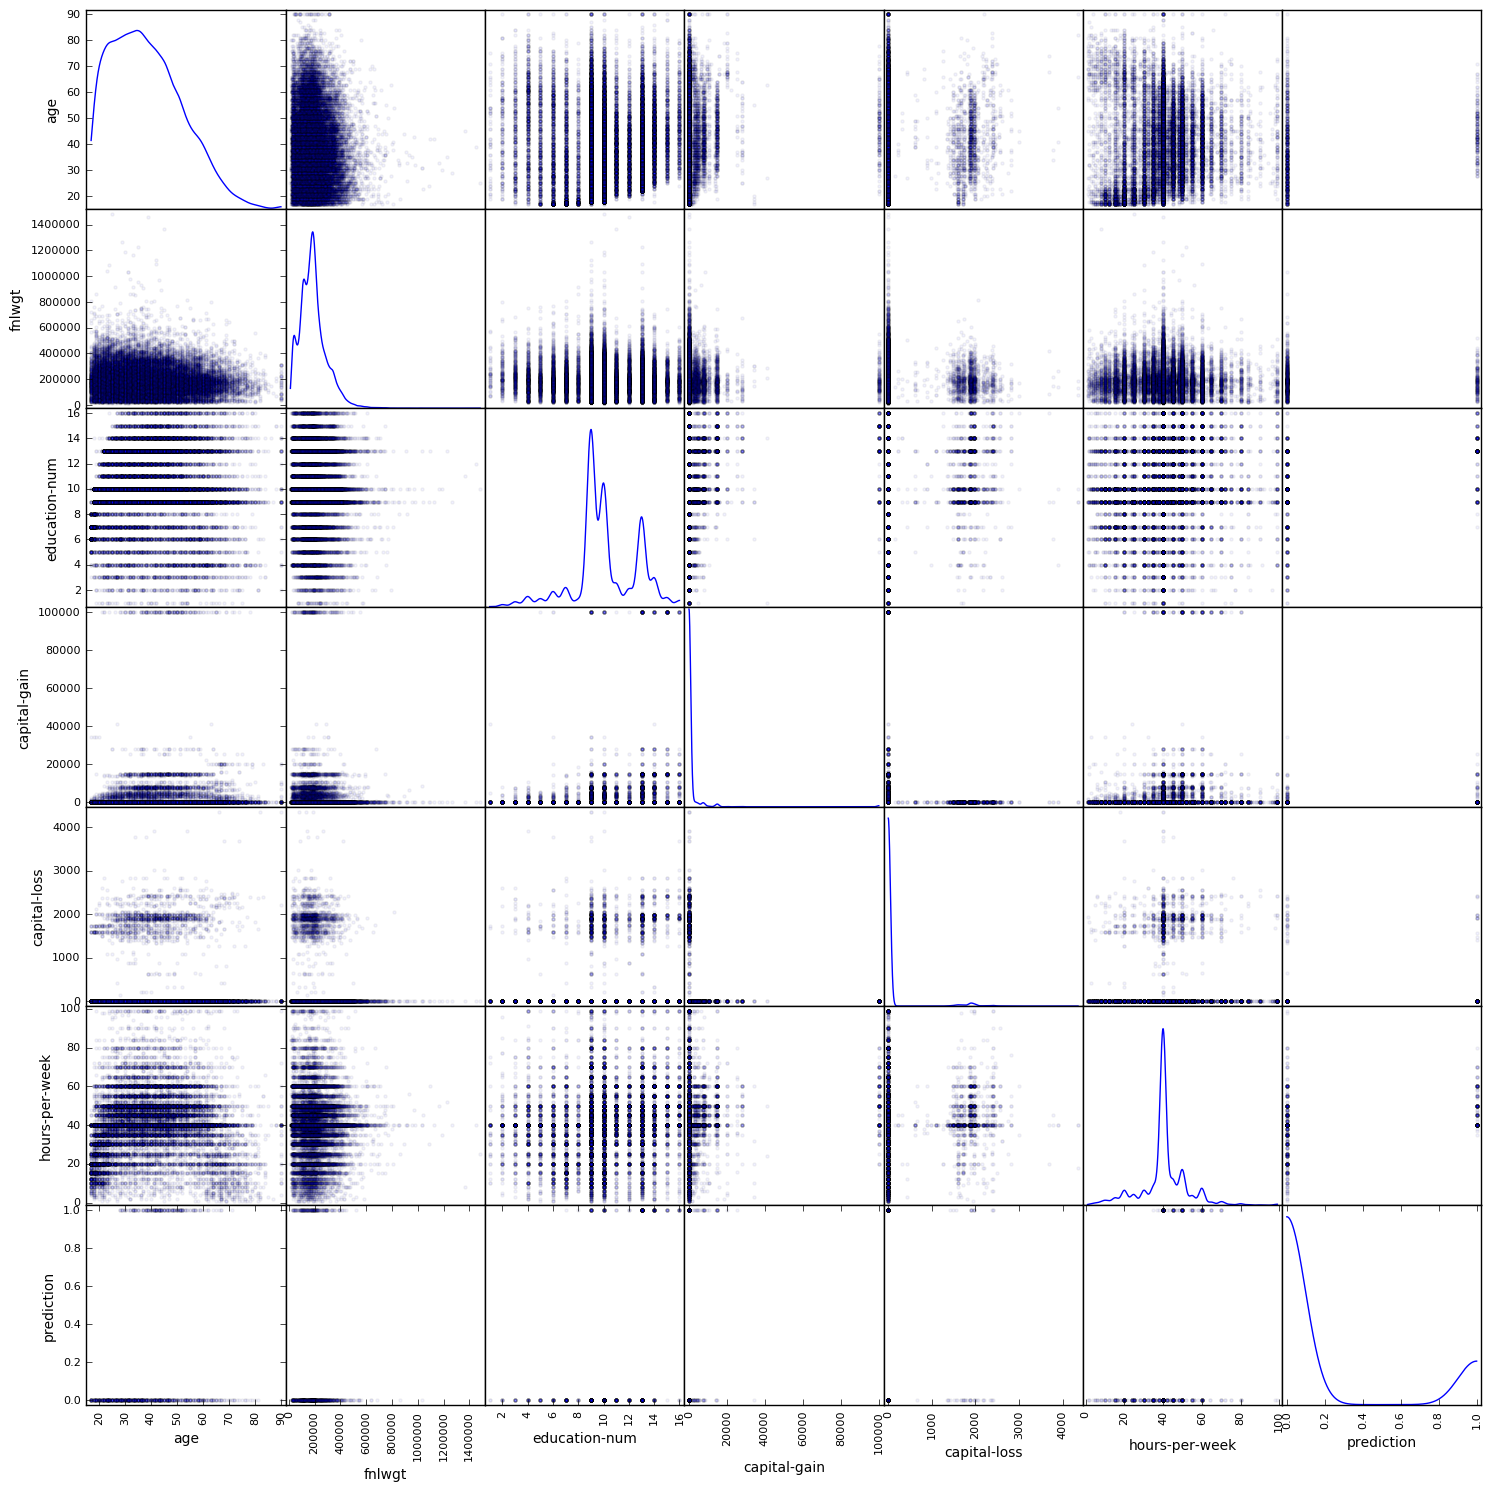

In [158]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix(csv_data, alpha=0.05, figsize=(18, 18), diagonal='kde')
plt.show()

In [ ]:

plt.scatter(
    csv_data[csv_data['income']=='>50K']['education-num'],
    csv_data[csv_data['income']=='>50K']['age'],
     alpha=0.1,
    label='>50K',
    color='r'
    )

plt.scatter(
    csv_data[csv_data['income']=='<=50K']['education-num'],
    csv_data[csv_data['income']=='<=50K']['age'],
     alpha=0.02,
    label='<=50K',
    color='b'
    )

plt.title('Scatter Plot of Education Vs Age')
plt.xlabel('education-num')
plt.ylabel('age')
plt.legend()
plt.show()

In [ ]:
from pylab import *
csv_data['education-num_rnd'] = csv_data['education-num'] + np.random.uniform(-0.5,0.5, len(csv_data))
plt.figure(figsize=(12,8))

plt.scatter(
    csv_data[csv_data['income']=='>50K']['education-num_rnd'],
    csv_data[csv_data['income']=='>50K']['age'],
    alpha=0.5,
    label='>50K',
    color='r'
    )
plt.scatter(
    csv_data[csv_data['income']=='<=50K']['education-num_rnd'],
    csv_data[csv_data['income']=='<=50K']['age'],
    alpha=0.1,
    label='<=50K',
    color='b'
    )

plt.xlabel('education-num')
plt.xticks(arange(17))
plt.xlim(0,17)
plt.ylabel('age')

#plt.legend()
plt.grid()
plt.title(u'From Census Data of 1994 (education-num \u00B10.5)')
plt.show()
csv_data = csv_data.drop('education-num_rnd', axis=1)

# Prepare Data 

In [ ]:
from sklearn.feature_extraction import DictVectorizer
vec = DictVectorizer()

features = vec.fit_transform(csv_data\
                             .drop("capital-gain", axis=1)\
                             .drop("capital-loss", axis=1)\
                             .drop("income", axis=1)\
                             .drop("fnlwgt", axis=1).to_dict( orient="records")).toarray()
results = csv_data["income"] == ">50K"


# Wenow split the data set into a traing and testing
X_train = features[1000:]
Y_train = results[1000:]
X_test = features[:1000]
Y_test = results[:1000]




# Train Classification Model using kNN Algorithm


In [ ]:
from  sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

knn = KNeighborsClassifier().fit(X_train, Y_train)


# Prediction¶


In [ ]:
predictions = knn.predict(X_test)
accuracy = predictions == Y_test
print("Accuracy: %s%%" % (round(np.average(accuracy)* 100)))

print("===============\nSamsple Data")
for counter in range(10):
    print("Prediction: %s is %s" % (predictions[counter], predictions[counter]==Y_test[counter]))

# Improving Accuracy

In [ ]:
target_names = ['<=50K', '>50K']
for kn in range(1,15):
    for method in ['uniform', 'distance']:
        knn = KNeighborsClassifier(n_neighbors=kn, weights=method).fit(X_train, Y_train)
        predictions = knn.predict(X_test)
        accuracy = predictions == Y_test
        print("Accuracy: %s%%, Neighbors: %s, Weights: %s" % (round(np.average(accuracy)* 100), kn, method))
        actual = pd.Series(Y_test).map({True: 1, False:0})
        predictions = pd.Series(predictions).map({True: 1, False:0})
        print(classification_report(actual.values, predictions.values, target_names=target_names))

# Results Inspection

In [ ]:
knn = KNeighborsClassifier(n_neighbors=14, weights='uniform').fit(X_train, Y_train)

predictions = knn.predict(X_test)

actual = pd.Series(Y_test).map({True: 1, False:0})
predictions = pd.Series(predictions).map({True: 1, False:0})
target_names = ['<=50K', '>50K']
print(classification_report(actual.values, predictions.values, target_names=target_names))

# Results

In [ ]:
csv_data["prediction"] = pd.Series(predictions)


# Quick Prediction

In [ ]:
person_features = {
 'age': 32,
 'education': 'Bachelors',
 'education-num': 16,
 'hours-per-week': 55,
 'marital-status': 'Married',
 'native-country': 'United-States',
 'occupation': 'Sales',
 'race': 'White',
 'relationship': 'Not-in-family',
 'sex': 'Female',
 'workclass': 'Private'
}
person_features = vec.transform(person_features).toarray()

prediction = knn.predict(person_features)[0]

labels={True: '>50K', False: '<=50K'}

print(labels[prediction])

